---
<span style="font-size: 28px;">**Ερώτηση 2**</span></br></br>
*Για να τρέξει όλο χρειάζεται περίπου μέχρι **30** λεπτά*

---
<span style="font-size: 25px;">**Βήμα 1**</span>

In [1]:
import json
import numpy as np

# Αρχείο JSON με τα δεδομένα
json_file_path = 'meta_Cell_Phones_and_Accessories.json'

# Δημιουργία λεξικού για αποθήκευση των προϊόντων και των κατηγοριών τους
products_dict = {}

# Ανοίγουμε το αρχείο JSON και διαβάζουμε κάθε γραμμή
with open(json_file_path, 'r', encoding='utf-8') as file:
    for line in file:
        # Κάνουμε parse τις γραμμές του αρχείου και δημιουργούμε ένα λεξικό
        product_data = json.loads(line)
        
        # Ελέγχουμε αρχικά αν
        # το προϊόν που είναι στο "category" που μας ενδιαφέρει(δηλ. “Chargers & Power Adapters” και “Car Chargers”)
        categories = product_data['category']
        if "Chargers & Power Adapters" in categories or "Car Chargers" in categories:
            # ΚΑΙ έχουν μη κενό το πεδίο "description"
            if len(product_data['description']) > 0:
                asin = product_data['asin']

                # Συνένωση όλων των Strings στην λίστα του πεδίου “description”
                description = ' '.join(product_data['description'])

                category_last = categories[-1]
                # Η τελευταία κατηγορία στη λίστα πρέπει να είναι ένα από τις 2 κατηγορίες που μας ενδιαφέρει
                if category_last == "Chargers & Power Adapters" or category_last == "Car Chargers":
                    # Κρατάμε την πρώτη εμφάνιση του asin
                    if asin not in products_dict:
                        products_dict[asin] = [description, category_last]
                    
# Μετατρέπουμε το λεξικό σε λίστα από λεξικά για την δημιουργία του τελικού dataset
final_dataset = []
for key, value in products_dict.items():
    final_dataset.append(value)
    
final_dataset = np.array(final_dataset)

print(len(final_dataset))
print(type(final_dataset))
print(type(final_dataset[1]))

# Εκτύπωση των πρώτων 5 στοιχείων του final_dataset
for i in range(5):
    print(final_dataset[i][0]) # description
    print(final_dataset[i][1]) # category
    print()
    
#                          [[   0   ,    1   ],[   0   ,    1   ],...]
# Μορφή του final_dataset: [[descr_1, categ_1],[descr_2, categ_2],...]

7007
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Portable lightweight red led car charger offers advanced circuitry for double mode charging at fast and then at a regulated 100% battery maintaining level without overcharging.
Car Chargers

The Samsung Car Charger gives you the charging performance needed while traveling in your vehicle. Perfect for people on the go.Compatible with the following models: AT and T PHONES: SGH-a127, SGH-a137, SGH-a167, SGH-A177, SGH-a227, SGH-a237, SGH-a257, SGH-a517, SGH-a637, SGH-a657, Propel SGH-A767, SGH-a777, Access SGH-a827, Rugby SGH-a837, Eternity SGH-a867, Impression SGH-A877, Solstice SGH-A887, Blackjack II SGH-i617, Propel Pro SGH-i627, Jack SGH-i637, Epix SGH-i907 SPRINT PHONES: ACE (SPH-i325, SPH-m300, SPH-m510, SPH-m520, Instinct SPH-m800, Instinct s30 SPH-m810, SPH-Z400 T-MOBILE PHONES: SGH-t109, SGH-t119, SGH-T139, SGH-t229, SGH-t239, SGH-T339, SGH-t349, SGH-T409, SGH-T429, Gravity SGH-t459, Gravity 2 SGH-T469, Beat SGH-T539, Comeback S

---
<span style="font-size: 25px;">**Βήμα 2**</span>

In [2]:
from sklearn import metrics

# Σε αυτήν την συνάρτηση θα υπολογίζουμε τις 5 μετρικές ΚΑΙ θα τις κρατάμε στους κατάλληλους πίνακες
def print_classification_metrics(confusion_matrices_cl, accuracy_scores_cl, precision_scores_cl, recall_scores_cl, f1_scores_cl, y_test, y_pred):
    # Confusion matrix
    print("\nConfusion matrix")
    confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
    print(confusion_matrix)
    confusion_matrices_cl.append(confusion_matrix)
    
    # Accuracy
    print("\nAccuracy:")
    accuracy = metrics.accuracy_score(y_test,y_pred)
    print(accuracy)
    accuracy_scores_cl.append(accuracy)

    # Precision Score per class
    #print("\nPrecision Score per class")
    #print(metrics.precision_score(y_test,y_pred,average=None))

    # Average Precision Score
    print("\nAverage Precision Score")
    precision = metrics.precision_score(y_test,y_pred,average='weighted')
    print(precision)
    precision_scores_cl.append(precision)

    # Recall Score per class
    #print("\nRecall Score per class")
    #print(metrics.recall_score(y_test,y_pred,average=None))

    # Average Recall Score
    print("\nAverage Recall Score")
    recall = metrics.recall_score(y_test,y_pred,average='weighted')
    print(recall)
    recall_scores_cl.append(recall)

    # F1-score Score per class
    #print("\nF1-score Score per class")
    #print(metrics.f1_score(y_test,y_pred,average=None))

    # Average F1 Score
    print("\nAverage F1 Score")
    f1 = metrics.f1_score(y_test,y_pred,average='weighted')
    print(f1)
    f1_scores_cl.append(f1)
    
    print("-------------------------------------------------------------------------")

**Σε αυτό το μέρος του κώδικα, έχει υλοποιηθεί το μεγαλύτερο μέρος του βήματος 2, και πιο συγκεκριμένα:**
* οι 3 classifier(+1 για διαφορετικά settings στο MLP, αλλάζοντας περισσότερο τις default παραμέτρους)
* τα 5 folds

*ο χρόνος που χρειάζεται για να τρέξει ο παρακάτω κώδικας είναι **~5-6** λεπτά (περισσότερο παρατηρείτε καθυστέριση όταν τρέχει ο `MLP` classifier, ~0.5 λεπτό)*
*χωρίς το `MLP_2` έτρεχε στα **~3***

In [3]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import KFold

import sklearn.feature_extraction.text as sk_text

from sklearn.linear_model import LinearRegression
import sklearn.linear_model as linear_model

from sklearn import svm

from sklearn.neural_network import MLPClassifier

from sklearn import metrics
import numpy as np

from sklearn.preprocessing import LabelEncoder

# Εξαγωγή των πεδίων description και category σε 2 ξεχωριστές λίστες
# Θυμίζουμε ότι το final_dataset είναι της μορφής: [[descr_1, categ_1],[descr_2, categ_2],...]
#                                                  [[   0   ,    1   ],[   0   ,    1   ],...]
descriptions = [data[0] for data in final_dataset]
categories = [data[1] for data in final_dataset]

# Ορισμός του TF-IDF Vectorizer
vectorizer = sk_text.TfidfVectorizer(stop_words='english', min_df=4, max_df=0.8)

# Υπολογισμός του TF-IDF (για να μπορέσουμε να διαχειριστούμε τα texts)
X = vectorizer.fit_transform(descriptions)

# Αρχικοποίηση του KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Αρχικοποίηση πινάκων για τη συλλογή των μετρικών(5) για κάθε Classifier(3)
confusion_matrices_lr_td_idf = []
confusion_matrices_svm_td_idf = []
confusion_matrices_mlp_td_idf = []
confusion_matrices_mlp_2 = []# για μια 2η δοκιμή με διαφορετικά settings για το MLP

accuracy_scores_lr_td_idf = []
accuracy_scores_svm_td_idf = []
accuracy_scores_mlp_td_idf = []
accuracy_scores_mlp_2 = []#

precision_scores_lr_td_idf = []
precision_scores_svm_td_idf = []
precision_scores_mlp_td_idf = []
precision_scores_mlp_2 = []#

recall_scores_lr_td_idf = []
recall_scores_svm_td_idf = []
recall_scores_mlp_td_idf = []
recall_scores_mlp_2 = []#

f1_scores_lr_td_idf = []
f1_scores_svm_td_idf = []
f1_scores_mlp_td_idf = []
f1_scores_mlp_2 = []#

# Εκτέλεση του KFold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    # Διαχωρισμός των δεδομένων
    X_train = X[train_index] #descriptions
    X_test = X[test_index]   #descriptions
    y_train = [categories[i] for i in train_index] #categories
    y_test = [categories[i] for i in test_index]   #categories
    
    # Logistic Regression
    print("Logistic Regression - Metrics")
    lr_clf = linear_model.LogisticRegression(solver='lbfgs')
    lr_clf.fit(X_train, y_train)
    y_pred = lr_clf.predict(X_test)
    # Metrics
    print_classification_metrics(confusion_matrices_lr_td_idf, accuracy_scores_lr_td_idf, precision_scores_lr_td_idf, recall_scores_lr_td_idf, f1_scores_lr_td_idf, y_test, y_pred)
    
    # SVM
    print("SVM - Metrics")
    svm_clf = svm.SVC()
    svm_clf.fit(X_train, y_train)
    y_pred = svm_clf.predict(X_test)
    # Metrics
    print_classification_metrics(confusion_matrices_svm_td_idf, accuracy_scores_svm_td_idf, precision_scores_svm_td_idf, recall_scores_svm_td_idf, f1_scores_svm_td_idf, y_test, y_pred)
    
    # MLP
    print("MLP - Metrics")
    mlp_clf = MLPClassifier(solver='lbfgs')
    mlp_clf.fit(X_train, y_train)
    y_pred = mlp_clf.predict(X_test)
    # Metrics
    print_classification_metrics(confusion_matrices_mlp_td_idf, accuracy_scores_mlp_td_idf, precision_scores_mlp_td_idf, recall_scores_mlp_td_idf, f1_scores_mlp_td_idf, y_test, y_pred)
    
    # MLP_2(με άλλα settings)
    print("MLP_2 - Metrics")
    mlp_2_clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1, max_iter=400, warm_start=True)
    mlp_2_clf.fit(X_train, y_train)
    y_pred = mlp_2_clf.predict(X_test)
    # Metrics
    print_classification_metrics(confusion_matrices_mlp_2, accuracy_scores_mlp_2, precision_scores_mlp_2, recall_scores_mlp_2, f1_scores_mlp_2, y_test, y_pred)

Logistic Regression - Metrics

Confusion matrix
[[725 103]
 [131 443]]

Accuracy:
0.833095577746077

Average Precision Score
0.8323844475370332

Average Recall Score
0.833095577746077

Average F1 Score
0.8323968389236956
-------------------------------------------------------------------------
SVM - Metrics

Confusion matrix
[[717 111]
 [112 462]]

Accuracy:
0.8409415121255349

Average Precision Score
0.8408997041766658

Average Recall Score
0.8409415121255349

Average F1 Score
0.8409201713054963
-------------------------------------------------------------------------
MLP - Metrics

Confusion matrix
[[717 111]
 [143 431]]

Accuracy:
0.818830242510699

Average Precision Score
0.8179510875160505

Average Recall Score
0.818830242510699

Average F1 Score
0.8179500755188708
-------------------------------------------------------------------------
MLP_2 - Metrics

Confusion matrix
[[718 110]
 [143 431]]

Accuracy:
0.8195435092724679

Average Precision Score
0.8186669326420154

Average Recal

In [4]:
# Εκτύπωση των πινάκων για την κάθε μετρική του κάθε classifier
# Βλέπουμε κάθε πίνακας να είναι μεγέθους 5, λόγω των 5 folds, αφού ο κάθε πίνακας έχει την μορφή:
# array_metric = [metric_fold_1, metric_fold_2, metric_fold_3, metric_fold_4, metric_fold_5]
# όπου όλα τα folds αναφέρονται σε έναν συγκεκριμένο classifier κάθε φορά

print(confusion_matrices_lr_td_idf)
print(confusion_matrices_svm_td_idf)
print(confusion_matrices_mlp_td_idf)
print(confusion_matrices_mlp_2)
print()
print(accuracy_scores_lr_td_idf)
print(accuracy_scores_svm_td_idf)
print(accuracy_scores_mlp_td_idf)
print(accuracy_scores_mlp_2)
print()
print(precision_scores_lr_td_idf)
print(precision_scores_svm_td_idf)
print(precision_scores_mlp_td_idf)
print(precision_scores_mlp_2)
print()
print(recall_scores_lr_td_idf)
print(recall_scores_svm_td_idf)
print(recall_scores_mlp_td_idf)
print(recall_scores_mlp_2)
print()
print(f1_scores_lr_td_idf)
print(f1_scores_svm_td_idf)
print(f1_scores_mlp_td_idf)
print(f1_scores_mlp_2)
print()

[array([[725, 103],
       [131, 443]], dtype=int64), array([[758,  94],
       [115, 435]], dtype=int64), array([[739, 109],
       [116, 437]], dtype=int64), array([[750, 100],
       [125, 426]], dtype=int64), array([[764, 101],
       [102, 434]], dtype=int64)]
[array([[717, 111],
       [112, 462]], dtype=int64), array([[758,  94],
       [ 94, 456]], dtype=int64), array([[739, 109],
       [ 81, 472]], dtype=int64), array([[740, 110],
       [ 95, 456]], dtype=int64), array([[751, 114],
       [ 84, 452]], dtype=int64)]
[array([[717, 111],
       [143, 431]], dtype=int64), array([[742, 110],
       [130, 420]], dtype=int64), array([[715, 133],
       [116, 437]], dtype=int64), array([[732, 118],
       [128, 423]], dtype=int64), array([[747, 118],
       [110, 426]], dtype=int64)]
[array([[718, 110],
       [143, 431]], dtype=int64), array([[765,  87],
       [119, 431]], dtype=int64), array([[729, 119],
       [121, 432]], dtype=int64), array([[746, 104],
       [140, 411]], dty

---
**Εδώ:**
* έχουν υπολογιστεί οι μετρικές που ζητόνται για τους 4 classifiers που έχουμε φτιάξει

In [5]:
# "Logistic Regression" - Εκτύπωση των μέσων τιμών των μετρικών
print("Logistic Regression - Mean Metrics")
print()
print("Mean Confusion Matrix:\n", sum(confusion_matrices_lr_td_idf)/len(confusion_matrices_lr_td_idf))
print("Mean Accuracy:\t", np.mean(accuracy_scores_lr_td_idf))
print("Mean Precision:\t", np.mean(precision_scores_lr_td_idf))
print("Mean Recall:\t", np.mean(recall_scores_lr_td_idf))
print("Mean F1-score:\t", np.mean(f1_scores_lr_td_idf))
print("--------------------------------------")
print()

# "SVM" - Εκτύπωση των μέσων τιμών των μετρικών
print("SVM - Mean Metrics")
print()
print("Mean Confusion Matrix:\n", sum(confusion_matrices_svm_td_idf)/len(confusion_matrices_svm_td_idf))
print("Mean Accuracy:\t", np.mean(accuracy_scores_svm_td_idf))
print("Mean Precision:\t", np.mean(precision_scores_svm_td_idf))
print("Mean Recall:\t", np.mean(recall_scores_svm_td_idf))
print("Mean F1-score:\t", np.mean(f1_scores_svm_td_idf))
print("--------------------------------------")
print()

# "MLP" - Εκτύπωση των μέσων τιμών των μετρικών
print("MLP - Mean Metrics")
print()
print("Mean Confusion Matrix:\n", sum(confusion_matrices_mlp_td_idf)/len(confusion_matrices_mlp_td_idf))
print("Mean Accuracy:\t", np.mean(accuracy_scores_mlp_td_idf))
print("Mean Precision:\t", np.mean(precision_scores_mlp_td_idf))
print("Mean Recall:\t", np.mean(recall_scores_mlp_td_idf))
print("Mean F1-score:\t", np.mean(f1_scores_mlp_td_idf))
print("--------------------------------------")
print()

# "MLP_2" - Εκτύπωση των μέσων τιμών των μετρικών
print("MLP_2 - Mean Metrics")
print()
print("Mean Confusion Matrix:\n", sum(confusion_matrices_mlp_2)/len(confusion_matrices_mlp_2))
print("Mean Accuracy:\t", np.mean(accuracy_scores_mlp_2))
print("Mean Precision:\t", np.mean(precision_scores_mlp_2))
print("Mean Recall:\t", np.mean(recall_scores_mlp_2))
print("Mean F1-score:\t", np.mean(f1_scores_mlp_2))

Logistic Regression - Mean Metrics

Mean Confusion Matrix:
 [[747.2 101.4]
 [117.8 435. ]]
Mean Accuracy:	 0.8435854357138421
Mean Precision:	 0.8430628083775755
Mean Recall:	 0.8435854357138421
Mean F1-score:	 0.8431555563093827
--------------------------------------

SVM - Mean Metrics

Mean Confusion Matrix:
 [[741.  107.6]
 [ 93.2 459.6]]
Mean Accuracy:	 0.8567156534816684
Mean Precision:	 0.8576666358839855
Mean Recall:	 0.8567156534816684
Mean F1-score:	 0.8570201630005027
--------------------------------------

MLP - Mean Metrics

Mean Confusion Matrix:
 [[730.6 118. ]
 [125.4 427.4]]
Mean Accuracy:	 0.8263172525025431
Mean Precision:	 0.8262043546253179
Mean Recall:	 0.8263172525025431
Mean F1-score:	 0.8260987274110526
--------------------------------------

MLP_2 - Mean Metrics

Mean Confusion Matrix:
 [[743.2 105.4]
 [125.4 427.4]]
Mean Accuracy:	 0.8353072647314278
Mean Precision:	 0.8347663366785077
Mean Recall:	 0.8353072647314278
Mean F1-score:	 0.8347343664478968


<span style="font-size: 18px;">**Παρατηρήσεις**</span></br>
Τα καλύτερα αποτελέσματα τα παρατηρούμε στον classifier `SVM` και τα χειρότερα στον `MLP`.</br>
Το `MLP_2` πετυχένει μία καλύτερη προσέγκιση, με τις κύριες αλλαγές να έγιναν σε αρκετές παραμέτρους αλλάζοντας με αυτόν τον τρόπο τις default τιμές τους.

---
**Εδώ βρίσκουμε για τον classifer Logistic Regression:**
* τις 20 λέξεις με το μεγαλύτερο θετικό βάρος
* τις 20 λέξεις με το μικρότερο αρνητικό βάρος

In [6]:
# Ανάλυση Logistic Regression classifier
feature_names = np.array(vectorizer.get_feature_names_out())

coefficients = lr_clf.coef_[0] # ένας πίνακας με τα βάρη για την κάθε λέξη

# τα ταξινομούμε από το μικρότερο στο μεγαλύτερο βάρος και άρα:
top_positive_words = feature_names[np.argsort(coefficients)[-20:]][::-1] # παίρνουμε τις λέξεις με το μεγαλύτερο θετικό βάρος[δηλ. τις τελευταίες 20] (κάνουμε και -1 για να αντιστρέψουμε την σειρά και να τα πάρουμε από το καλύτερο στο χειρότερο)
top_negative_words = feature_names[np.argsort(coefficients)[:20]] # παίρνουμε τις λέξεις με το μικρότερο αρνητικό βάρος[δηλ. τις πρώτες 20]

print("Top 20 Positive Words:\n", top_positive_words)
print()
print("Top 20 Negative Words:\n", top_negative_words)

Top 20 Positive Words:
 ['wall' 'travel' 'home' 'ac' 'battery' 'desktop' '240v' 'dock' 'sync' 'qi'
 'extra' 'nokia' '100v' 'original' 'receiver' 'station' 'office' 'simply'
 '60hz' '30']

Top 20 Negative Words:
 ['car' 'vehicle' '12v' 'lighter' 'cigarette' 'dual' 'dc' '24v' '12'
 'indicated' 'auto' 'road' 'mount' 'powered' 'title' 'button' '1a' 'meter'
 'cars' 'led']


<span style="font-size: 18px;">**Παρατηρήσεις**</span></br>
Άρα, η λέξη `wall` είναι λέξη με το μεγαλύτερο θετικό βάρος & η λέξη `car` είναι λέξη με το μικρότερο αρνητικό βάρος.

---
**Εδώ ξανα γράφουμε τον ίδιο κώδικα απλά η διαφορά είναι ότι** (δεν είναι ο καλύτερος τρόπος να υλοποιηθεί αυτή η μικρή αλλαγή μίας μόνο γραμμής με τόσες γραμμές κώδικα πάλι, αλλά έτσι όπως δομήθηκε ο κώδικας, ήταν φυσικό να γίνει κάπως έτσι) **:**
* αλλάζουμε τις παραμέτρους του tf-idf vectorizer

In [7]:
# Εξαγωγή των πεδίων description και category σε 2 ξεχωριστές λίστες
# Θυμίζουμε ότι το final_dataset είναι της μορφής: [[descr_1, categ_1],[descr_2, categ_2],...]
#                                                  [[   0   ,    1   ],[   0   ,    1   ],...]
descriptions = [data[0] for data in final_dataset]
categories = [data[1] for data in final_dataset]

# Ορισμός του TF-IDF Vectorizer
vectorizer = sk_text.TfidfVectorizer(stop_words='english', 
                                     max_features=1500,       # αυξάνουμε το πλήθος των features(λέξεις)
                                     min_df=2,                # μικραίνουμε minimum document frequency
                                     max_df=0.9,              # αυξάνουμε maximum document frequency
                                     ngram_range=(1, 4),      # τώρα λαμβάνουμε υπόψην μας μέχρι και φράσεις με 4 λέξεις
                                     norm='l1')               # εφαρμόζουμε L1 νόρμα στα διανύσματα κειμένου

# Υπολογισμός του TF-IDF (για να μπορέσουμε να διαχειριστούμε τα texts)
X = vectorizer.fit_transform(descriptions)

# Αρχικοποίηση του KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Αρχικοποίηση πινάκων για τη συλλογή των μετρικών(5) για κάθε Classifier(3)
confusion_matrices_lr = []
confusion_matrices_svm = []
confusion_matrices_mlp = []

accuracy_scores_lr = []
accuracy_scores_svm = []
accuracy_scores_mlp = []

precision_scores_lr = []
precision_scores_svm = []
precision_scores_mlp = []

recall_scores_lr = []
recall_scores_svm = []
recall_scores_mlp = []

f1_scores_lr = []
f1_scores_svm = []
f1_scores_mlp = []

# Εκτέλεση του KFold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    # Διαχωρισμός των δεδομένων
    X_train = X[train_index] #descriptions
    X_test = X[test_index]   #descriptions
    y_train = [categories[i] for i in train_index] #categories
    y_test = [categories[i] for i in test_index]   #categories
    
    # Logistic Regression
    print("Logistic Regression - Metrics")
    lr_clf = linear_model.LogisticRegression(solver='lbfgs')
    lr_clf.fit(X_train, y_train)
    y_pred = lr_clf.predict(X_test)
    # Metrics
    print_classification_metrics(confusion_matrices_lr, accuracy_scores_lr, precision_scores_lr, recall_scores_lr, f1_scores_lr, y_test, y_pred)
    
    # SVM
    print("SVM - Metrics")
    svm_clf = svm.SVC()
    svm_clf.fit(X_train, y_train)
    y_pred = svm_clf.predict(X_test)
    # Metrics
    print_classification_metrics(confusion_matrices_svm, accuracy_scores_svm, precision_scores_svm, recall_scores_svm, f1_scores_svm, y_test, y_pred)
    
    # MLP
    print("MLP - Metrics")
    mlp_clf = MLPClassifier(solver='lbfgs')
    mlp_clf.fit(X_train, y_train)
    y_pred = mlp_clf.predict(X_test)
    # Metrics
    print_classification_metrics(confusion_matrices_mlp, accuracy_scores_mlp, precision_scores_mlp, recall_scores_mlp, f1_scores_mlp, y_test, y_pred)

Logistic Regression - Metrics

Confusion matrix
[[806  22]
 [408 166]]

Accuracy:
0.6932952924393724

Average Precision Score
0.7536064986604967

Average Recall Score
0.6932952924393724

Average F1 Score
0.6446011175170858
-------------------------------------------------------------------------
SVM - Metrics

Confusion matrix
[[709 119]
 [109 465]]

Accuracy:
0.8373751783166904

Average Precision Score
0.8378781404389932

Average Recall Score
0.8373751783166904

Average F1 Score
0.8375833579644824
-------------------------------------------------------------------------
MLP - Metrics

Confusion matrix
[[712 116]
 [116 458]]

Accuracy:
0.8345221112696148

Average Precision Score
0.8345221112696148

Average Recall Score
0.8345221112696148

Average F1 Score
0.8345221112696148
-------------------------------------------------------------------------
Logistic Regression - Metrics

Confusion matrix
[[827  25]
 [378 172]]

Accuracy:
0.7125534950071327

Average Precision Score
0.7595839198600

In [8]:
# Εκτύπωση των πινάκων για την κάθε μετρική του κάθε classifier
# Βλέπουμε κάθε πίνακας να είναι μεγέθους 5, λόγω των 5 folds, αφού ο κάθε πίνακας έχει την μορφή:
# array_metric = [metric_fold_1, metric_fold_2, metric_fold_3, metric_fold_4, metric_fold_5]
# όπου όλα τα folds αναφέρονται σε έναν συγκεκριμένο classifier κάθε φορά

print(confusion_matrices_lr)
print(confusion_matrices_svm)
print(confusion_matrices_mlp)
print()
print(accuracy_scores_lr)
print(accuracy_scores_svm)
print(accuracy_scores_mlp)
print()
print(precision_scores_lr)
print(precision_scores_svm)
print(precision_scores_mlp)
print()
print(recall_scores_lr)
print(recall_scores_svm)
print(recall_scores_mlp)
print()
print(f1_scores_lr)
print(f1_scores_svm)
print(f1_scores_mlp)
print()

[array([[806,  22],
       [408, 166]], dtype=int64), array([[827,  25],
       [378, 172]], dtype=int64), array([[823,  25],
       [365, 188]], dtype=int64), array([[815,  35],
       [373, 178]], dtype=int64), array([[828,  37],
       [367, 169]], dtype=int64)]
[array([[709, 119],
       [109, 465]], dtype=int64), array([[751, 101],
       [ 95, 455]], dtype=int64), array([[730, 118],
       [ 92, 461]], dtype=int64), array([[733, 117],
       [ 98, 453]], dtype=int64), array([[734, 131],
       [ 67, 469]], dtype=int64)]
[array([[712, 116],
       [116, 458]], dtype=int64), array([[737, 115],
       [113, 437]], dtype=int64), array([[716, 132],
       [ 89, 464]], dtype=int64), array([[732, 118],
       [114, 437]], dtype=int64), array([[744, 121],
       [ 92, 444]], dtype=int64)]

[0.6932952924393724, 0.7125534950071327, 0.721627408993576, 0.708779443254818, 0.7116345467523197]
[0.8373751783166904, 0.8601997146932953, 0.8501070663811563, 0.8465381870092791, 0.8586723768736617]
[

In [9]:
# "Logistic Regression" - Εκτύπωση των μέσων τιμών των μετρικών
print("Logistic Regression - Mean Metrics")
print()
print("Mean Confusion Matrix:\n", sum(confusion_matrices_lr)/len(confusion_matrices_lr))
print("Mean Accuracy:\t", np.mean(accuracy_scores_lr))
print("Mean Precision:\t", np.mean(precision_scores_lr))
print("Mean Recall:\t", np.mean(recall_scores_lr))
print("Mean F1-score:\t", np.mean(f1_scores_lr))
print("--------------------------------------")
print()

# "SVM" - Εκτύπωση των μέσων τιμών των μετρικών
print("SVM - Mean Metrics")
print()
print("Mean Confusion Matrix:\n", sum(confusion_matrices_svm)/len(confusion_matrices_svm))
print("Mean Accuracy:\t", np.mean(accuracy_scores_svm))
print("Mean Precision:\t", np.mean(precision_scores_svm))
print("Mean Recall:\t", np.mean(recall_scores_svm))
print("Mean F1-score:\t", np.mean(f1_scores_svm))
print("--------------------------------------")
print()

# "MLP" - Εκτύπωση των μέσων τιμών των μετρικών
print("MLP - Mean Metrics")
print()
print("Mean Confusion Matrix:\n", sum(confusion_matrices_mlp)/len(confusion_matrices_mlp))
print("Mean Accuracy:\t", np.mean(accuracy_scores_mlp))
print("Mean Precision:\t", np.mean(precision_scores_mlp))
print("Mean Recall:\t", np.mean(recall_scores_mlp))
print("Mean F1-score:\t", np.mean(f1_scores_mlp))

Logistic Regression - Mean Metrics

Mean Confusion Matrix:
 [[819.8  28.8]
 [378.2 174.6]]
Mean Accuracy:	 0.7095780372894438
Mean Precision:	 0.7534894186604311
Mean Recall:	 0.7095780372894438
Mean F1-score:	 0.6672218455226329
--------------------------------------

SVM - Mean Metrics

Mean Confusion Matrix:
 [[731.4 117.2]
 [ 92.2 460.6]]
Mean Accuracy:	 0.8505785046548165
Mean Precision:	 0.8525469113240248
Mean Recall:	 0.8505785046548165
Mean F1-score:	 0.8510974397593483
--------------------------------------

MLP - Mean Metrics

Mean Confusion Matrix:
 [[728.2 120.4]
 [104.8 448. ]]
Mean Accuracy:	 0.8393045114504515
Mean Precision:	 0.8404823565179121
Mean Recall:	 0.8393045114504515
Mean F1-score:	 0.8396569988580727


<span style="font-size: 18px;">**Παρατηρήσεις**</span></br>
Με τις αλλαγές που κάναμε στις παραμέτρους του `tf-idf vectorizer`, βλέπουμε ότι στον classifier `Logistic Regrassion` έχουμε χαλάσει κατα πολύ την ακρίβειά του, ενώ στους άλλους 2 classifiers παρατηρούμε ότι η ακρίβεια έχει παραμείνει σχετικά σταθερή, αλλά εννοείτε διαφορετική από τον προηγούμενο κώδικα με το παλιό tf-idf vectorizer.

---
<span style="font-size: 25px;">**Βήμα 3**</span>

*ο χρόνος που χρειάζεται για να τρέξει ο παρακάτω κώδικας είναι **~7** λεπτά (χρειάζεται λίγο περισσότερο χρόνο από ότι η προηγούμενη τεχνική)*

In [10]:
import gensim 
import gensim.models
from gensim.models import Word2Vec
from gensim import utils

# Εξαγωγή των πεδίων description και category σε 2 ξεχωριστές λίστες
# Θυμίζουμε ότι το final_dataset είναι της μορφής: [[descr_1, categ_1],[descr_2, categ_2],...]
#                                                  [[   0   ,    1   ],[   0   ,    1   ],...]
descriptions = [data[0] for data in final_dataset]
categories = [data[1] for data in final_dataset]

# Αρχικοποίηση του KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Αρχικοποίηση πινάκων για τη συλλογή των μετρικών(5) για κάθε Classifier(3)
confusion_matrices_lr_doc2vec = []
confusion_matrices_svm_doc2vec = []
confusion_matrices_mlp_doc2vec = []

accuracy_scores_lr_doc2vec = []
accuracy_scores_svm_doc2vec = []
accuracy_scores_mlp_doc2vec = []

precision_scores_lr_doc2vec = []
precision_scores_svm_doc2vec = []
precision_scores_mlp_doc2vec = []

recall_scores_lr_doc2vec = []
recall_scores_svm_doc2vec = []
recall_scores_mlp_doc2vec = []

f1_scores_lr_doc2vec = []
f1_scores_svm_doc2vec = []
f1_scores_mlp_doc2vec = []

# Εκτέλεση του KFold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(descriptions)):
    # Διαχωρισμός των δεδομένων
    X_train = [descriptions[i] for i in train_index] #descriptions
    X_test = [descriptions[i] for i in test_index]   #descriptions
    y_train = [categories[i] for i in train_index] #categories
    y_test = [categories[i] for i in test_index]   #categories
    
    ###
    # Γίνεται το tokenization(μπορούμε να το αποφήγουμε και να το χειριστούμε αργότερα)
    # αλλά είναι μια καλή τεχνική αυτή που επιλέχτηκε και είναι και βάση του φροντιστηρίου 
    train_gsim = [utils.simple_preprocess(x) for x in X_train]
    train_data_labels = [(x,y) for (x,y) in zip(train_gsim, y_train) if len(x) > 0]
    X_train_gsim = [x for (x,y) in train_data_labels] #descriptions
    y_train_gsim = [y for (x,y) in train_data_labels] #categories

    test_gsim = [utils.simple_preprocess(x) for x in X_test]
    test_data_labels = [(x,y) for (x,y) in zip(test_gsim, y_test) if len(x) > 0]
    X_test_gsim = [x for (x,y) in test_data_labels] #descriptions
    y_test_gsim = [y for (x,y) in test_data_labels] #categories
    #
    # Προετοιμασία δεδομένων για το Doc2Vec
    train_corpus = [gensim.models.doc2vec.TaggedDocument(X_train_gsim[i], [i]) for i in range(len(X_train_gsim))]

    # Εκπαίδευση του Doc2Vec model
    d2v_model = gensim.models.doc2vec.Doc2Vec(vector_size=80, min_count=1, epochs=60)
    d2v_model.build_vocab(train_corpus)
    d2v_model.train(train_corpus, total_examples=d2v_model.corpus_count, epochs=d2v_model.epochs)
    
    # Δημιουργία των embeddings με το Doc2Vec model
    X_train_d2v = [d2v_model.infer_vector(x) for x in X_train_gsim]
    X_test_d2v = [d2v_model.infer_vector(x) for x in X_test_gsim]
    ###
    
    ###
    # Logistic Regression
    print("Logistic Regression - Metrics")
    lr_clf = linear_model.LogisticRegression(solver='lbfgs')
    lr_clf.fit(X_train_d2v, np.array(y_train_gsim))
    y_pred = lr_clf.predict(X_test_d2v)
    # Metrics
    print_classification_metrics(confusion_matrices_lr_doc2vec, accuracy_scores_lr_doc2vec, precision_scores_lr_doc2vec, recall_scores_lr_doc2vec, f1_scores_lr_doc2vec, y_test_gsim, y_pred)
    
    # SVM
    print("SVM - Metrics")
    svm_clf = svm.SVC()
    svm_clf.fit(X_train_d2v, np.array(y_train_gsim))
    y_pred = svm_clf.predict(X_test_d2v)
    # Metrics
    print_classification_metrics(confusion_matrices_svm_doc2vec, accuracy_scores_svm_doc2vec, precision_scores_svm_doc2vec, recall_scores_svm_doc2vec, f1_scores_svm_doc2vec, y_test_gsim, y_pred)
    
    # MLP
    print("MLP - Metrics")
    mlp_clf = MLPClassifier(solver='lbfgs')
    mlp_clf.fit(X_train_d2v, np.array(y_train_gsim))
    y_pred = mlp_clf.predict(X_test_d2v)
    # Metrics
    print_classification_metrics(confusion_matrices_mlp_doc2vec, accuracy_scores_mlp_doc2vec, precision_scores_mlp_doc2vec, recall_scores_mlp_doc2vec, f1_scores_mlp_doc2vec, y_test_gsim, y_pred)    
    ###


Logistic Regression - Metrics

Confusion matrix
[[677 148]
 [227 344]]

Accuracy:
0.7313753581661891

Average Precision Score
0.7285624367752539

Average Recall Score
0.7313753581661891

Average F1 Score
0.7275304239262972
-------------------------------------------------------------------------
SVM - Metrics

Confusion matrix
[[696 129]
 [165 406]]

Accuracy:
0.7893982808022922

Average Precision Score
0.78812219260176

Average Recall Score
0.7893982808022922

Average F1 Score
0.7882191833159061
-------------------------------------------------------------------------
MLP - Metrics

Confusion matrix
[[642 183]
 [173 398]]

Accuracy:
0.7449856733524355

Average Precision Score
0.7457213771045398

Average Recall Score
0.7449856733524355

Average F1 Score
0.7453150236642052
-------------------------------------------------------------------------
Logistic Regression - Metrics

Confusion matrix
[[718 132]
 [228 320]]

Accuracy:
0.7424892703862661

Average Precision Score
0.738985709934712

In [11]:
# Εκτύπωση των πινάκων για την κάθε μετρική του κάθε classifier
# Βλέπουμε κάθε πίνακας να είναι μεγέθους 5, λόγω των 5 folds, αφού ο κάθε πίνακας έχει την μορφή:
# array_metric = [metric_fold_1, metric_fold_2, metric_fold_3, metric_fold_4, metric_fold_5]
# όπου όλα τα folds αναφέρονται σε έναν συγκεκριμένο classifier κάθε φορά

print(confusion_matrices_lr_doc2vec)
print(confusion_matrices_svm_doc2vec)
print(confusion_matrices_mlp_doc2vec)
print()
print(accuracy_scores_lr_doc2vec)
print(accuracy_scores_svm_doc2vec)
print(accuracy_scores_mlp_doc2vec)
print()
print(precision_scores_lr_doc2vec)
print(precision_scores_svm_doc2vec)
print(precision_scores_mlp_doc2vec)
print()
print(recall_scores_lr_doc2vec)
print(recall_scores_svm_doc2vec)
print(recall_scores_mlp_doc2vec)
print()
print(f1_scores_lr_doc2vec)
print(f1_scores_svm_doc2vec)
print(f1_scores_mlp_doc2vec)
print()

[array([[677, 148],
       [227, 344]], dtype=int64), array([[718, 132],
       [228, 320]], dtype=int64), array([[716, 129],
       [218, 333]], dtype=int64), array([[701, 144],
       [234, 315]], dtype=int64), array([[700, 163],
       [186, 350]], dtype=int64)]
[array([[696, 129],
       [165, 406]], dtype=int64), array([[711, 139],
       [185, 363]], dtype=int64), array([[703, 142],
       [160, 391]], dtype=int64), array([[694, 151],
       [176, 373]], dtype=int64), array([[719, 144],
       [146, 390]], dtype=int64)]
[array([[642, 183],
       [173, 398]], dtype=int64), array([[660, 190],
       [163, 385]], dtype=int64), array([[651, 194],
       [163, 388]], dtype=int64), array([[634, 211],
       [165, 384]], dtype=int64), array([[682, 181],
       [144, 392]], dtype=int64)]

[0.7313753581661891, 0.7424892703862661, 0.751432664756447, 0.7288378766140603, 0.7505360972122945]
[0.7893982808022922, 0.7682403433476395, 0.7836676217765043, 0.7654232424677188, 0.7927090779127949]


In [12]:
# "Logistic Regression" - Εκτύπωση των μέσων τιμών των μετρικών
print("Logistic Regression - Mean Metrics")
print()
print("Mean Confusion Matrix:\n", sum(confusion_matrices_lr_doc2vec)/len(confusion_matrices_lr_doc2vec))
print("Mean Accuracy:\t", np.mean(accuracy_scores_lr_doc2vec))
print("Mean Precision:\t", np.mean(precision_scores_lr_doc2vec))
print("Mean Recall:\t", np.mean(recall_scores_lr_doc2vec))
print("Mean F1-score:\t", np.mean(f1_scores_lr_doc2vec))
print("--------------------------------------")
print()

# "SVM" - Εκτύπωση των μέσων τιμών των μετρικών
print("SVM - Mean Metrics")
print()
print("Mean Confusion Matrix:\n", sum(confusion_matrices_svm_doc2vec)/len(confusion_matrices_svm_doc2vec))
print("Mean Accuracy:\t", np.mean(accuracy_scores_svm_doc2vec))
print("Mean Precision:\t", np.mean(precision_scores_svm_doc2vec))
print("Mean Recall:\t", np.mean(recall_scores_svm_doc2vec))
print("Mean F1-score:\t", np.mean(f1_scores_svm_doc2vec))
print("--------------------------------------")
print()

# "MLP" - Εκτύπωση των μέσων τιμών των μετρικών
print("MLP - Mean Metrics")
print()
print("Mean Confusion Matrix:\n", sum(confusion_matrices_mlp_doc2vec)/len(confusion_matrices_mlp_doc2vec))
print("Mean Accuracy:\t", np.mean(accuracy_scores_mlp_doc2vec))
print("Mean Precision:\t", np.mean(precision_scores_mlp_doc2vec))
print("Mean Recall:\t", np.mean(recall_scores_mlp_doc2vec))
print("Mean F1-score:\t", np.mean(f1_scores_mlp_doc2vec))

Logistic Regression - Mean Metrics

Mean Confusion Matrix:
 [[702.4 143.2]
 [218.6 332.4]]
Mean Accuracy:	 0.7409342534270514
Mean Precision:	 0.7379128930630945
Mean Recall:	 0.7409342534270514
Mean F1-score:	 0.7368603317862614
--------------------------------------

SVM - Mean Metrics

Mean Confusion Matrix:
 [[704.6 141. ]
 [166.4 384.6]]
Mean Accuracy:	 0.77988771326139
Mean Precision:	 0.7786233152149388
Mean Recall:	 0.77988771326139
Mean F1-score:	 0.7788965701266071
--------------------------------------

MLP - Mean Metrics

Mean Confusion Matrix:
 [[653.8 191.8]
 [161.6 389.4]]
Mean Accuracy:	 0.7469430485276141
Mean Precision:	 0.7499188217117136
Mean Recall:	 0.7469430485276141
Mean F1-score:	 0.7480263576035842


<span style="font-size: 18px;">**Παρατηρήσεις**</span></br>
Οι τιμές των μετρικών με το μοντέλο `Doc2Vec` είναι σίγουρα **χειρότερες** από τις αντίστοιχες τιμές που είχαμε στο προηγούμενο Βήμα με χρήση της tf-idf αναπαράστασης.</br>
<span style="font-size: 12px;">*Θα γίνει πιο αναλυτική σύγκριση όταν δούμε και το Βήμα 4*</span>

---
<span style="font-size: 25px;">**Βήμα 4**</span>

In [13]:
import gensim.downloader as api

glove_model = api.load("glove-wiki-gigaword-50")

*ο χρόνος που χρειάζεται για να τρέξει ο παρακάτω κώδικας είναι **~1** λεπτό (αισθητά ο λιγότερος χρόνος)*

In [14]:
import gensim 
import gensim.models
from gensim.models import Word2Vec
from gensim import utils

# Εξαγωγή των πεδίων description και category σε 2 ξεχωριστές λίστες
# Θυμίζουμε ότι το final_dataset είναι της μορφής: [[descr_1, categ_1],[descr_2, categ_2],...]
#                                                  [[   0   ,    1   ],[   0   ,    1   ],...]
descriptions = [data[0] for data in final_dataset]
categories = [data[1] for data in final_dataset]

# Αρχικοποίηση του KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Αρχικοποίηση πινάκων για τη συλλογή των μετρικών(5) για κάθε Classifier(3)
confusion_matrices_lr_glove = []
confusion_matrices_svm_glove = []
confusion_matrices_mlp_glove = []

accuracy_scores_lr_glove = []
accuracy_scores_svm_glove = []
accuracy_scores_mlp_glove = []

precision_scores_lr_glove = []
precision_scores_svm_glove = []
precision_scores_mlp_glove = []

recall_scores_lr_glove = []
recall_scores_svm_glove = []
recall_scores_mlp_glove = []

f1_scores_lr_glove = []
f1_scores_svm_glove = []
f1_scores_mlp_glove = []

# Εκτέλεση του KFold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(descriptions)):
    # Διαχωρισμός των δεδομένων
    X_train = [descriptions[i] for i in train_index] #descriptions
    X_test = [descriptions[i] for i in test_index]   #descriptions
    y_train = [categories[i] for i in train_index] #categories
    y_test = [categories[i] for i in test_index]   #categories
    
    ###
    # Γίνεται το tokenization(μπορούμε να το αποφήγουμε και να το χειριστούμε αργότερα)
    # αλλά είναι μια καλή τεχνική αυτή που επιλέχτηκε και είναι και βάση του φροντιστηρίου 
    train_gsim = [utils.simple_preprocess(x) for x in X_train]
    train_data_labels = [(x,y) for (x,y) in zip(train_gsim, y_train) if len(x) > 0]
    X_train_gsim = [x for (x,y) in train_data_labels] #descriptions
    y_train_gsim = [y for (x,y) in train_data_labels] #categories

    test_gsim = [utils.simple_preprocess(x) for x in X_test]
    test_data_labels = [(x,y) for (x,y) in zip(test_gsim, y_test) if len(x) > 0]
    X_test_gsim = [x for (x,y) in test_data_labels] #descriptions
    y_test_gsim = [y for (x,y) in test_data_labels] #categories
    #
    # Δημιουργία των embeddings με το Glove
    train_glove = [[glove_model[x] for x in y if x in glove_model] for y in X_train_gsim]
    train_data_labels = [(x,y) for (x,y) in zip(train_glove, y_train) if len(x) > 0]
    X_train_glove = [np.array(x).mean(axis=0) for (x,y) in train_data_labels]
    y_train_glove = [y for (x,y) in train_data_labels]
    
    test_glove = [[glove_model[x] for x in y if x in glove_model] for y in X_test_gsim]
    test_data_labels = [(x,y) for (x,y) in zip(test_glove, y_test) if len(x) > 0]
    X_test_glove = [np.array(x).mean(axis=0) for (x,y) in test_data_labels]
    y_test_glove = [y for (x,y) in test_data_labels]
    ###

    # Logistic Regression
    print("Logistic Regression - Metrics")
    lr_clf = linear_model.LogisticRegression(solver='lbfgs')
    lr_clf.fit(X_train_glove, np.array(y_train_glove))
    y_pred = lr_clf.predict(X_test_glove)
    # Metrics
    print_classification_metrics(confusion_matrices_lr_glove, accuracy_scores_lr_glove, precision_scores_lr_glove, recall_scores_lr_glove, f1_scores_lr_glove, y_test_glove, y_pred)
    
    # SVM
    print("SVM - Metrics")
    svm_clf = svm.SVC()
    svm_clf.fit(X_train_glove, np.array(y_train_glove))
    y_pred = svm_clf.predict(X_test_glove)
    # Metrics
    print_classification_metrics(confusion_matrices_svm_glove, accuracy_scores_svm_glove, precision_scores_svm_glove, recall_scores_svm_glove, f1_scores_svm_glove, y_test_glove, y_pred)
    
    # MLP
    print("MLP - Metrics")
    mlp_clf = MLPClassifier(solver='lbfgs')
    mlp_clf.fit(X_train_glove, np.array(y_train_glove))
    y_pred = mlp_clf.predict(X_test_glove)
    # Metrics
    print_classification_metrics(confusion_matrices_mlp_glove, accuracy_scores_mlp_glove, precision_scores_mlp_glove, recall_scores_mlp_glove, f1_scores_mlp_glove, y_test_glove, y_pred)    

Logistic Regression - Metrics

Confusion matrix
[[811  13]
 [553  18]]

Accuracy:
0.5942652329749104

Average Precision Score
0.5888731224839445

Average Recall Score
0.5942652329749104

Average F1 Score
0.4623589866300909
-------------------------------------------------------------------------
SVM - Metrics

Confusion matrix
[[824   0]
 [571   0]]

Accuracy:
0.5906810035842294

Average Precision Score
0.3489040479952724

Average Recall Score
0.5906810035842294

Average F1 Score
0.4386851256903154
-------------------------------------------------------------------------
MLP - Metrics

Confusion matrix
[[666 158]
 [400 171]]

Accuracy:
0.6

Average Precision Score
0.5817834474814236

Average Recall Score
0.6

Average F1 Score
0.5718306878306878
-------------------------------------------------------------------------
Logistic Regression - Metrics

Confusion matrix
[[813  36]
 [511  36]]

Accuracy:
0.6081661891117478

Average Precision Score
0.5693603433201465

Average Recall Score
0.60

In [15]:
# Εκτύπωση των πινάκων για την κάθε μετρική του κάθε classifier
# Βλέπουμε κάθε πίνακας να είναι μεγέθους 5, λόγω των 5 folds, αφού ο κάθε πίνακας έχει την μορφή:
# array_metric = [metric_fold_1, metric_fold_2, metric_fold_3, metric_fold_4, metric_fold_5]
# όπου όλα τα folds αναφέρονται σε έναν συγκεκριμένο classifier κάθε φορά

print(confusion_matrices_lr_glove)
print(confusion_matrices_svm_glove)
print(confusion_matrices_mlp_glove)
print()
print(accuracy_scores_lr_glove)
print(accuracy_scores_svm_glove)
print(accuracy_scores_mlp_glove)
print()
print(precision_scores_lr_glove)
print(precision_scores_svm_glove)
print(precision_scores_mlp_glove)
print()
print(recall_scores_lr_glove)
print(recall_scores_svm_glove)
print(recall_scores_mlp_glove)
print()
print(f1_scores_lr_glove)
print(f1_scores_svm_glove)
print(f1_scores_mlp_glove)
print()

[array([[811,  13],
       [553,  18]], dtype=int64), array([[813,  36],
       [511,  36]], dtype=int64), array([[807,  36],
       [527,  26]], dtype=int64), array([[819,  29],
       [519,  27]], dtype=int64), array([[829,  35],
       [502,  33]], dtype=int64)]
[array([[824,   0],
       [571,   0]], dtype=int64), array([[848,   1],
       [546,   1]], dtype=int64), array([[843,   0],
       [551,   2]], dtype=int64), array([[848,   0],
       [545,   1]], dtype=int64), array([[864,   0],
       [535,   0]], dtype=int64)]
[array([[666, 158],
       [400, 171]], dtype=int64), array([[635, 214],
       [377, 170]], dtype=int64), array([[625, 218],
       [397, 156]], dtype=int64), array([[647, 201],
       [385, 161]], dtype=int64), array([[670, 194],
       [370, 165]], dtype=int64)]

[0.5942652329749104, 0.6081661891117478, 0.5967048710601719, 0.6068866571018652, 0.6161543959971408]
[0.5906810035842294, 0.6081661891117478, 0.6053008595988538, 0.609038737446198, 0.6175839885632595]


In [16]:
# "Logistic Regression" - Εκτύπωση των μέσων τιμών των μετρικών
print("Logistic Regression - Mean Metrics")
print()
print("Mean Confusion Matrix:\n", sum(confusion_matrices_lr_glove)/len(confusion_matrices_lr_glove))
print("Mean Accuracy:\t", np.mean(accuracy_scores_lr_glove))
print("Mean Precision:\t", np.mean(precision_scores_lr_glove))
print("Mean Recall:\t", np.mean(recall_scores_lr_glove))
print("Mean F1-score:\t", np.mean(f1_scores_lr_glove))
print("--------------------------------------")
print()

# "SVM" - Εκτύπωση των μέσων τιμών των μετρικών
print("SVM - Mean Metrics")
print()
print("Mean Confusion Matrix:\n", sum(confusion_matrices_svm_glove)/len(confusion_matrices_svm_glove))
print("Mean Accuracy:\t", np.mean(accuracy_scores_svm_glove))
print("Mean Precision:\t", np.mean(precision_scores_svm_glove))
print("Mean Recall:\t", np.mean(recall_scores_svm_glove))
print("Mean F1-score:\t", np.mean(f1_scores_svm_glove))
print("--------------------------------------")
print()

# "MLP" - Εκτύπωση των μέσων τιμών των μετρικών
print("MLP - Mean Metrics")
print()
print("Mean Confusion Matrix:\n", sum(confusion_matrices_mlp_glove)/len(confusion_matrices_mlp_glove))
print("Mean Accuracy:\t", np.mean(accuracy_scores_mlp_glove))
print("Mean Precision:\t", np.mean(precision_scores_mlp_glove))
print("Mean Recall:\t", np.mean(recall_scores_mlp_glove))
print("Mean F1-score:\t", np.mean(f1_scores_mlp_glove))

Logistic Regression - Mean Metrics

Mean Confusion Matrix:
 [[815.8  29.8]
 [522.4  28. ]]
Mean Accuracy:	 0.6044354692491672
Mean Precision:	 0.5642210524270248
Mean Recall:	 0.6044354692491672
Mean F1-score:	 0.4887026303232558
--------------------------------------

SVM - Mean Metrics

Mean Confusion Matrix:
 [[8.454e+02 2.000e-01]
 [5.496e+02 8.000e-01]]
Mean Accuracy:	 0.6061541556608577
Mean Precision:	 0.5639004773078165
Mean Recall:	 0.6061541556608577
Mean F1-score:	 0.4582682319388255
--------------------------------------

MLP - Mean Metrics

Mean Confusion Matrix:
 [[648.6 197. ]
 [385.8 164.6]]
Mean Accuracy:	 0.5825170041914638
Mean Precision:	 0.5601181288684463
Mean Recall:	 0.5825170041914638
Mean F1-score:	 0.5602862696966929


<span style="font-size: 18px;">**Παρατηρήσεις**</span></br>
Οι τιμές των μετρικών με το μοντέλο `Glove` είναι αισθητά **χειρότερες** από τις αντίστοιχες τιμές που είχαμε και στα δύο προηγούμενα Βήματα.</br>
Αυτό είναι αναμενόμενο, αφού η συγκεκριμένη τεχνική δεν είναι κατάλληλη στο classification. Αυτό οφείλεται στον περιορισμό των λέξεων που έχουμε αφού χειριζόμαστε λέξεις από ένα συγκεκριμένο σύνολο που κατεβάσαμε.

---
Παρακάτω βλέπουμε 3 διαγράμματα, ένα για τον κάθε classifier **[Logistic Regression - SVM - MLP]**.</br>
Το κάθε διάγραμμα έχει 3 κύριες στήλες, μία για κάθε μοντέλο χειρισμού του κειμένου **[tf_idf - Doc2Vec - Glove]**.</br>
Η κάθε κύρια στήλη έχει 4 υπο-στήλες, που αναφέρονται για κάθε μια μέτρικη *(δεν έχει συμπεριλυφθεί μόνο η μετρική του "confusion matrix")* **[Accuracy - Precision - Recall - F1_measure]**.

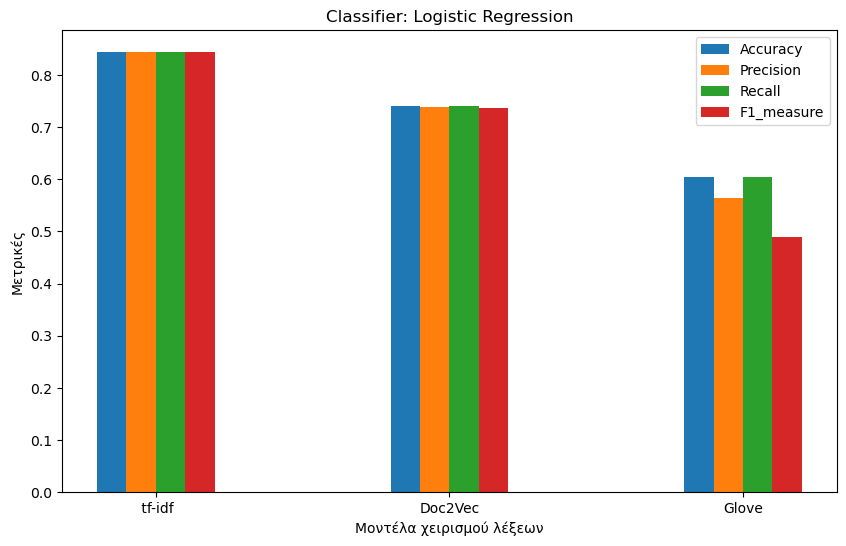

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
words = [" tf-idf", "Doc2Vec", "Glove"]
accuracy = [np.mean(accuracy_scores_lr_td_idf), np.mean(accuracy_scores_lr_doc2vec), np.mean(accuracy_scores_lr_glove)]
precision = [np.mean(precision_scores_lr_td_idf), np.mean(precision_scores_lr_doc2vec), np.mean(precision_scores_lr_glove)]
recall = [np.mean(recall_scores_lr_td_idf), np.mean(recall_scores_lr_doc2vec), np.mean(recall_scores_lr_glove)]
F1_measure = [np.mean(f1_scores_lr_td_idf), np.mean(f1_scores_lr_doc2vec), np.mean(f1_scores_lr_glove)]

# Plotting
bar_width = 0.1  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(np.arange(len(words)), accuracy, bar_width, label='Accuracy')
bar2 = ax.bar(np.arange(len(words)) + bar_width, precision, bar_width, label='Precision')
bar3 = ax.bar(np.arange(len(words)) + bar_width + bar_width, recall, bar_width, label='Recall')
bar4 = ax.bar(np.arange(len(words)) + bar_width + bar_width + bar_width, F1_measure, bar_width, label='F1_measure')

ax.set_xlabel('Μοντέλα χειρισμού λέξεων')
ax.set_ylabel('Μετρικές')
ax.set_title('Classifier: Logistic Regression')
ax.set_xticks(np.arange(len(words)) + bar_width*1.5)
ax.set_xticklabels(words)
ax.legend()

plt.show()

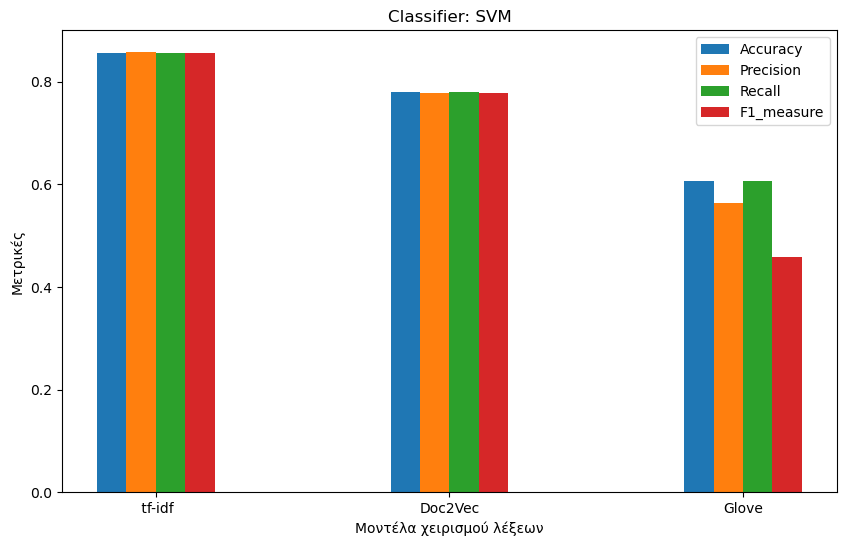

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
words = [" tf-idf", "Doc2Vec", "Glove"]
accuracy = [np.mean(accuracy_scores_svm_td_idf), np.mean(accuracy_scores_svm_doc2vec), np.mean(accuracy_scores_svm_glove)]
precision = [np.mean(precision_scores_svm_td_idf), np.mean(precision_scores_svm_doc2vec), np.mean(precision_scores_svm_glove)]
recall = [np.mean(recall_scores_svm_td_idf), np.mean(recall_scores_svm_doc2vec), np.mean(recall_scores_svm_glove)]
F1_measure = [np.mean(f1_scores_svm_td_idf), np.mean(f1_scores_svm_doc2vec), np.mean(f1_scores_svm_glove)]

# Plotting
bar_width = 0.1  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(np.arange(len(words)), accuracy, bar_width, label='Accuracy')
bar2 = ax.bar(np.arange(len(words)) + bar_width, precision, bar_width, label='Precision')
bar3 = ax.bar(np.arange(len(words)) + bar_width + bar_width, recall, bar_width, label='Recall')
bar4 = ax.bar(np.arange(len(words)) + bar_width + bar_width + bar_width, F1_measure, bar_width, label='F1_measure')

ax.set_xlabel('Μοντέλα χειρισμού λέξεων')
ax.set_ylabel('Μετρικές')
ax.set_title('Classifier: SVM')
ax.set_xticks(np.arange(len(words)) + bar_width*1.5)
ax.set_xticklabels(words)
ax.legend()

plt.show()

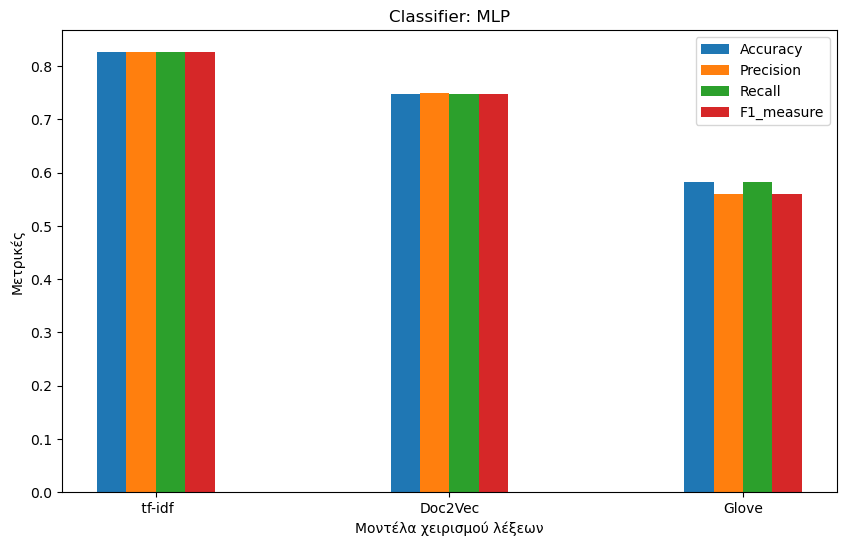

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
words = [" tf-idf", "Doc2Vec", "Glove"]
accuracy = [np.mean(accuracy_scores_mlp_td_idf), np.mean(accuracy_scores_mlp_doc2vec), np.mean(accuracy_scores_mlp_glove)]
precision = [np.mean(precision_scores_mlp_td_idf), np.mean(precision_scores_mlp_doc2vec), np.mean(precision_scores_mlp_glove)]
recall = [np.mean(recall_scores_mlp_td_idf), np.mean(recall_scores_mlp_doc2vec), np.mean(recall_scores_mlp_glove)]
F1_measure = [np.mean(f1_scores_mlp_td_idf), np.mean(f1_scores_mlp_doc2vec), np.mean(f1_scores_mlp_glove)]

# Plotting
bar_width = 0.1  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(np.arange(len(words)), accuracy, bar_width, label='Accuracy')
bar2 = ax.bar(np.arange(len(words)) + bar_width, precision, bar_width, label='Precision')
bar3 = ax.bar(np.arange(len(words)) + bar_width + bar_width, recall, bar_width, label='Recall')
bar4 = ax.bar(np.arange(len(words)) + bar_width + bar_width + bar_width, F1_measure, bar_width, label='F1_measure')

ax.set_xlabel('Μοντέλα χειρισμού λέξεων')
ax.set_ylabel('Μετρικές')
ax.set_title('Classifier: MLP')
ax.set_xticks(np.arange(len(words)) + bar_width*1.5)
ax.set_xticklabels(words)
ax.legend()

plt.show()

<span style="font-size: 18px;">**Παρατηρήσεις**</span></br>
Μετά από αυτά τα 3 διαγράμματα, παρατηρούμε ότι το **καλύτερο** μοντέλο χειρισμού κειμένου στην περίπτωσή μας, είναι το `tf-idf` και το **χειρότερο** το `Glove`.

---
---
---
<span style="font-size: 21px;">**Bonus**</span></br></br>
<span style="font-size: 16px;">**Μεθοδολογία σκέψης, για να βελτιώσουμε την ακρίβεια των προβλέψεων**</span></br>
Καλό θα ήταν το έξτρα πεδίο που θα πάρουμε να είναι και αυτό σε μορφή string ώστε να έχει ίδιο τύπο με το `description`.</br>
Παρατηρούμε ότι το πεδίο `rank` είναι σε αυτήν την μορφή που θέλουμε και επίσης βλέπουμε ότι σε αυτό το πεδίο περιέχει το category, επομένως υποθέτουμε ότι αυτό θα βοηθήσει σε ένα πολύ μεγάλο βαθμό στην κατηγοριοποίηση (ίσως αυτή η κίνηση να μην ήταν η πιο θεμιτή, γιατί έχει σεχδόν ξεκάθαρα την αντίστοιχη κατηγορία που ψάχνουμε να κατηγοριοποίησουμε - αλλά μπορούμε με ακριβώς τον ίδιο τρόπο αντί για το πεδίο `rank` να βάζαμε όποιο άλλο πεδίο θέλαμε, που να πληρεί της πληρή ιδανικά τις προϋποθέσεις που αναφέραμε παραπάνω).</br>
Επομένως ενισχύουμε την πληροφορία του `description` με την πληροφορία του πεδίου `rank`, κάνοντας μία συνένωση αυτών των δύο.</br></br>
*Το κομμάτι κώδικα που τροποποιήθηκε/προστέθηκε, αφορά μόνο το βήμα 1 της άσκησης 2, και πιο συγκεκριμένα τις γραμμές: **21, 28, 31 και 38**.*

In [20]:
import json
import numpy as np

# Αρχείο JSON με τα δεδομένα
json_file_path = 'meta_Cell_Phones_and_Accessories.json'

# Δημιουργία λεξικού για αποθήκευση των προϊόντων και των κατηγοριών τους
products_dict = {}

# Ανοίγουμε το αρχείο JSON και διαβάζουμε κάθε γραμμή
with open(json_file_path, 'r', encoding='utf-8') as file:
    for line in file:
        # Κάνουμε parse τις γραμμές του αρχείου και δημιουργούμε ένα λεξικό
        product_data = json.loads(line)
        
        # Ελέγχουμε αρχικά αν
        # το προϊόν που είναι στο "category" που μας ενδιαφέρει(δηλ. “Chargers & Power Adapters” και “Car Chargers”)
        categories = product_data['category']
        if "Chargers & Power Adapters" in categories or "Car Chargers" in categories:
            # ΚΑΙ έχουν μη κενό το πεδίο "description"
            if (len(product_data['description']) > 0) & (len(product_data['rank']) > 0):######################################
                asin = product_data['asin']

                # Συνένωση όλων των Strings στην λίστα του πεδίου “description”
                description = ' '.join(product_data['description'])
                
                # Συνένωση όλων των Strings στην λίστα του πεδίου “rank”
                rank = ' '.join(product_data['rank'])######################################
                
                # Συνένωση των 2 παραπάνω Strings
                combined_info = description + " " + rank######################################

                category_last = categories[-1]
                # Η τελευταία κατηγορία στη λίστα πρέπει να είναι ένα από τις 2 κατηγορίες που μας ενδιαφέρει
                if category_last == "Chargers & Power Adapters" or category_last == "Car Chargers":
                    # Κρατάμε την πρώτη εμφάνιση του asin
                    if asin not in products_dict:
                        products_dict[asin] = [combined_info, category_last]######################################
                    
# Μετατρέπουμε το λεξικό σε λίστα από λεξικά για την δημιουργία του τελικού dataset
final_dataset = []
for key, value in products_dict.items():
    final_dataset.append(value)
    
final_dataset = np.array(final_dataset)

print(len(final_dataset))
# Εκτύπωση των πρώτων 5 στοιχείων του final_dataset
for i in range(5):
    print(final_dataset[i][0]) # description & rank
    print(final_dataset[i][1]) # category
    print()
    
#                          [[        0       ,    1   ],[        0       ,    1   ],...]
# Μορφή του final_dataset: [[descr_1 & rank_1, categ_1],[descr_2 & rank_2, categ_2],...]

6939
Portable lightweight red led car charger offers advanced circuitry for double mode charging at fast and then at a regulated 100% battery maintaining level without overcharging. >#2,855,042 in Cell Phones & Accessories (See Top 100 in Cell Phones & Accessories) >#29,801 in Cell Phones & Accessories > Cell Phone Accessories > Car Accessories > Car Chargers >#86,213 in Cell Phones & Accessories > Cell Phone Accessories > Chargers & Power Adapters >#140,062 in Electronics > Accessories & Supplies > Vehicle Electronics Accessories
Car Chargers

The Samsung Car Charger gives you the charging performance needed while traveling in your vehicle. Perfect for people on the go.Compatible with the following models: AT and T PHONES: SGH-a127, SGH-a137, SGH-a167, SGH-A177, SGH-a227, SGH-a237, SGH-a257, SGH-a517, SGH-a637, SGH-a657, Propel SGH-A767, SGH-a777, Access SGH-a827, Rugby SGH-a837, Eternity SGH-a867, Impression SGH-A877, Solstice SGH-A887, Blackjack II SGH-i617, Propel Pro SGH-i627, Jac

<span style="font-size: 18px;">**tf-idf vectorizer**</span>

In [21]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import KFold

import sklearn.feature_extraction.text as sk_text

from sklearn.linear_model import LinearRegression
import sklearn.linear_model as linear_model

from sklearn import svm

from sklearn.neural_network import MLPClassifier

from sklearn import metrics
import numpy as np

from sklearn.preprocessing import LabelEncoder

# Εξαγωγή των πεδίων description και category σε 2 ξεχωριστές λίστες
# Θυμίζουμε ότι το final_dataset είναι της μορφής: [[descr_1 & rank_1, categ_1],[descr_2 & rank_2, categ_2],...]
#                                                  [[        0       ,    1   ],[        0       ,    1   ],...]
descriptions_rank = [data[0] for data in final_dataset]
categories = [data[1] for data in final_dataset]

# Ορισμός του TF-IDF Vectorizer
vectorizer = sk_text.TfidfVectorizer(stop_words='english', min_df=4, max_df=0.8)

# Υπολογισμός του TF-IDF (για να μπορέσουμε να διαχειριστούμε τα texts)
X = vectorizer.fit_transform(descriptions_rank)

# Αρχικοποίηση του KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Αρχικοποίηση πινάκων για τη συλλογή των μετρικών(5) για κάθε Classifier(3)
confusion_matrices_lr_td_idf_bonus = []
confusion_matrices_svm_td_idf_bonus = []
confusion_matrices_mlp_td_idf_bonus = []

accuracy_scores_lr_td_idf_bonus = []
accuracy_scores_svm_td_idf_bonus = []
accuracy_scores_mlp_td_idf_bonus = []

precision_scores_lr_td_idf_bonus = []
precision_scores_svm_td_idf_bonus = []
precision_scores_mlp_td_idf_bonus = []

recall_scores_lr_td_idf_bonus = []
recall_scores_svm_td_idf_bonus = []
recall_scores_mlp_td_idf_bonus = []

f1_scores_lr_td_idf_bonus = []
f1_scores_svm_td_idf_bonus = []
f1_scores_mlp_td_idf_bonus = []

# Εκτέλεση του KFold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    # Διαχωρισμός των δεδομένων
    X_train = X[train_index] #descriptions & rank
    X_test = X[test_index]   #descriptions & rank
    y_train = [categories[i] for i in train_index] #categories
    y_test = [categories[i] for i in test_index]   #categories
    
    # Logistic Regression
    print("Logistic Regression - Metrics")
    lr_clf = linear_model.LogisticRegression(solver='lbfgs')
    lr_clf.fit(X_train, y_train)
    y_pred = lr_clf.predict(X_test)
    # Metrics
    print_classification_metrics(confusion_matrices_lr_td_idf_bonus, accuracy_scores_lr_td_idf_bonus, precision_scores_lr_td_idf_bonus, recall_scores_lr_td_idf_bonus, f1_scores_lr_td_idf_bonus, y_test, y_pred)
    
    # SVM
    print("SVM - Metrics")
    svm_clf = svm.SVC()
    svm_clf.fit(X_train, y_train)
    y_pred = svm_clf.predict(X_test)
    # Metrics
    print_classification_metrics(confusion_matrices_svm_td_idf_bonus, accuracy_scores_svm_td_idf_bonus, precision_scores_svm_td_idf_bonus, recall_scores_svm_td_idf_bonus, f1_scores_svm_td_idf_bonus, y_test, y_pred)
    
    # MLP
    print("MLP - Metrics")
    mlp_clf = MLPClassifier(solver='lbfgs')
    mlp_clf.fit(X_train, y_train)
    y_pred = mlp_clf.predict(X_test)
    # Metrics
    print_classification_metrics(confusion_matrices_mlp_td_idf_bonus, accuracy_scores_mlp_td_idf_bonus, precision_scores_mlp_td_idf_bonus, recall_scores_mlp_td_idf_bonus, f1_scores_mlp_td_idf_bonus, y_test, y_pred)

Logistic Regression - Metrics

Confusion matrix
[[825  30]
 [  9 524]]

Accuracy:
0.9719020172910663

Average Precision Score
0.9725580442438669

Average Recall Score
0.9719020172910663

Average F1 Score
0.9719987563231077
-------------------------------------------------------------------------
SVM - Metrics

Confusion matrix
[[820  35]
 [ 14 519]]

Accuracy:
0.9646974063400576

Average Precision Score
0.9653992772448361

Average Recall Score
0.9646974063400576

Average F1 Score
0.9648189502521095
-------------------------------------------------------------------------
MLP - Metrics

Confusion matrix
[[838  17]
 [ 32 501]]

Accuracy:
0.9646974063400576

Average Precision Score
0.9647402349752544

Average Recall Score
0.9646974063400576

Average F1 Score
0.9645989744196224
-------------------------------------------------------------------------
Logistic Regression - Metrics

Confusion matrix
[[773  33]
 [ 17 565]]

Accuracy:
0.9639769452449568

Average Precision Score
0.9643650139382

In [22]:
# "Logistic Regression" - Εκτύπωση των μέσων τιμών των μετρικών
print("Logistic Regression - Mean Metrics")
print()
print("Mean Confusion Matrix:\n", sum(confusion_matrices_lr_td_idf_bonus)/len(confusion_matrices_lr_td_idf_bonus))
print("Mean Accuracy:\t", np.mean(accuracy_scores_lr_td_idf_bonus))
print("Mean Precision:\t", np.mean(precision_scores_lr_td_idf_bonus))
print("Mean Recall:\t", np.mean(recall_scores_lr_td_idf_bonus))
print("Mean F1-score:\t", np.mean(f1_scores_lr_td_idf_bonus))
print("--------------------------------------")
print()

# "SVM" - Εκτύπωση των μέσων τιμών των μετρικών
print("SVM - Mean Metrics")
print()
print("Mean Confusion Matrix:\n", sum(confusion_matrices_svm_td_idf_bonus)/len(confusion_matrices_svm_td_idf_bonus))
print("Mean Accuracy:\t", np.mean(accuracy_scores_svm_td_idf_bonus))
print("Mean Precision:\t", np.mean(precision_scores_svm_td_idf_bonus))
print("Mean Recall:\t", np.mean(recall_scores_svm_td_idf_bonus))
print("Mean F1-score:\t", np.mean(f1_scores_svm_td_idf_bonus))
print("--------------------------------------")
print()

# "MLP" - Εκτύπωση των μέσων τιμών των μετρικών
print("MLP - Mean Metrics")
print()
print("Mean Confusion Matrix:\n", sum(confusion_matrices_mlp_td_idf_bonus)/len(confusion_matrices_mlp_td_idf_bonus))
print("Mean Accuracy:\t", np.mean(accuracy_scores_mlp_td_idf_bonus))
print("Mean Precision:\t", np.mean(precision_scores_mlp_td_idf_bonus))
print("Mean Recall:\t", np.mean(recall_scores_mlp_td_idf_bonus))
print("Mean F1-score:\t", np.mean(f1_scores_mlp_td_idf_bonus))
print("--------------------------------------")
print()

Logistic Regression - Mean Metrics

Mean Confusion Matrix:
 [[807.   32.8]
 [ 15.  533. ]]
Mean Accuracy:	 0.9655562458315066
Mean Precision:	 0.9660838800069701
Mean Recall:	 0.9655562458315066
Mean F1-score:	 0.9656473135387253
--------------------------------------

SVM - Mean Metrics

Mean Confusion Matrix:
 [[802.   37.8]
 [ 18.2 529.8]]
Mean Accuracy:	 0.9596474259748302
Mean Precision:	 0.9602918286548585
Mean Recall:	 0.9596474259748302
Mean F1-score:	 0.9597660222641895
--------------------------------------

MLP - Mean Metrics

Mean Confusion Matrix:
 [[824.   15.8]
 [ 27.4 520.6]]
Mean Accuracy:	 0.9688719251842448
Mean Precision:	 0.9689403729425085
Mean Recall:	 0.9688719251842448
Mean F1-score:	 0.9688018252087609
--------------------------------------



<span style="font-size: 18px;">**Doc2Vec**</span>

In [23]:
import gensim 
import gensim.models
from gensim.models import Word2Vec
from gensim import utils

# Εξαγωγή των πεδίων description και category σε 2 ξεχωριστές λίστες
# Θυμίζουμε ότι το final_dataset είναι της μορφής: [[descr_1 & rank_1, categ_1],[descr_2 & rank_2, categ_2],...]
#                                                  [[        0       ,    1   ],[        0       ,    1   ],...]
descriptions_rank = [data[0] for data in final_dataset]
categories = [data[1] for data in final_dataset]

# Αρχικοποίηση του KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Αρχικοποίηση πινάκων για τη συλλογή των μετρικών(5) για κάθε Classifier(3)
confusion_matrices_lr_doc2vec_bonus = []
confusion_matrices_svm_doc2vec_bonus = []
confusion_matrices_mlp_doc2vec_bonus = []

accuracy_scores_lr_doc2vec_bonus = []
accuracy_scores_svm_doc2vec_bonus = []
accuracy_scores_mlp_doc2vec_bonus = []

precision_scores_lr_doc2vec_bonus = []
precision_scores_svm_doc2vec_bonus = []
precision_scores_mlp_doc2vec_bonus = []

recall_scores_lr_doc2vec_bonus = []
recall_scores_svm_doc2vec_bonus = []
recall_scores_mlp_doc2vec_bonus = []

f1_scores_lr_doc2vec_bonus = []
f1_scores_svm_doc2vec_bonus = []
f1_scores_mlp_doc2vec_bonus = []

# Εκτέλεση του KFold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(descriptions_rank)):
    # Διαχωρισμός των δεδομένων
    X_train = [descriptions_rank[i] for i in train_index] #descriptions & rank
    X_test = [descriptions_rank[i] for i in test_index]   #descriptions & rank
    y_train = [categories[i] for i in train_index] #categories
    y_test = [categories[i] for i in test_index]   #categories
    
    ###
    # Γίνεται το tokenization(μπορούμε να το αποφήγουμε και να το χειριστούμε αργότερα)
    # αλλά είναι μια καλή τεχνική αυτή που επιλέχτηκε και είναι και βάση του φροντιστηρίου 
    train_gsim = [utils.simple_preprocess(x) for x in X_train]
    train_data_labels = [(x,y) for (x,y) in zip(train_gsim, y_train) if len(x) > 0]
    X_train_gsim = [x for (x,y) in train_data_labels] #descriptions & rank
    y_train_gsim = [y for (x,y) in train_data_labels] #categories

    test_gsim = [utils.simple_preprocess(x) for x in X_test]
    test_data_labels = [(x,y) for (x,y) in zip(test_gsim, y_test) if len(x) > 0]
    X_test_gsim = [x for (x,y) in test_data_labels] #descriptions & rank
    y_test_gsim = [y for (x,y) in test_data_labels] #categories
    #
    # Προετοιμασία δεδομένων για το Doc2Vec
    train_corpus = [gensim.models.doc2vec.TaggedDocument(X_train_gsim[i], [i]) for i in range(len(X_train_gsim))]

    # Εκπαίδευση του Doc2Vec model
    d2v_model = gensim.models.doc2vec.Doc2Vec(vector_size=80, min_count=1, epochs=60)
    d2v_model.build_vocab(train_corpus)
    d2v_model.train(train_corpus, total_examples=d2v_model.corpus_count, epochs=d2v_model.epochs)
    
    # Δημιουργία των embeddings με το Doc2Vec model
    X_train_d2v = [d2v_model.infer_vector(x) for x in X_train_gsim]
    X_test_d2v = [d2v_model.infer_vector(x) for x in X_test_gsim]
    ###
    
    ###
    # Logistic Regression
    print("Logistic Regression - Metrics")
    lr_clf = linear_model.LogisticRegression(solver='lbfgs')
    lr_clf.fit(X_train_d2v, np.array(y_train_gsim))
    y_pred = lr_clf.predict(X_test_d2v)
    # Metrics
    print_classification_metrics(confusion_matrices_lr_doc2vec_bonus, accuracy_scores_lr_doc2vec_bonus, precision_scores_lr_doc2vec_bonus, recall_scores_lr_doc2vec_bonus, f1_scores_lr_doc2vec_bonus, y_test_gsim, y_pred)
    
    # SVM
    print("SVM - Metrics")
    svm_clf = svm.SVC()
    svm_clf.fit(X_train_d2v, np.array(y_train_gsim))
    y_pred = svm_clf.predict(X_test_d2v)
    # Metrics
    print_classification_metrics(confusion_matrices_svm_doc2vec_bonus, accuracy_scores_svm_doc2vec_bonus, precision_scores_svm_doc2vec_bonus, recall_scores_svm_doc2vec_bonus, f1_scores_svm_doc2vec_bonus, y_test_gsim, y_pred)
    
    # MLP
    print("MLP - Metrics")
    mlp_clf = MLPClassifier(solver='lbfgs')
    mlp_clf.fit(X_train_d2v, np.array(y_train_gsim))
    y_pred = mlp_clf.predict(X_test_d2v)
    # Metrics
    print_classification_metrics(confusion_matrices_mlp_doc2vec_bonus, accuracy_scores_mlp_doc2vec_bonus, precision_scores_mlp_doc2vec_bonus, recall_scores_mlp_doc2vec_bonus, f1_scores_mlp_doc2vec_bonus, y_test_gsim, y_pred)    
    ###

Logistic Regression - Metrics

Confusion matrix
[[756  99]
 [ 59 474]]

Accuracy:
0.8861671469740634

Average Precision Score
0.8890600066591683

Average Recall Score
0.8861671469740634

Average F1 Score
0.8868623395448708
-------------------------------------------------------------------------
SVM - Metrics

Confusion matrix
[[753 102]
 [ 45 488]]

Accuracy:
0.8940922190201729

Average Precision Score
0.8988760458024855

Average Recall Score
0.8940922190201729

Average F1 Score
0.8949539981818905
-------------------------------------------------------------------------
MLP - Metrics

Confusion matrix
[[745 110]
 [ 75 458]]

Accuracy:
0.8667146974063401

Average Precision Score
0.8692917503615918

Average Recall Score
0.8667146974063401

Average F1 Score
0.8674406864608242
-------------------------------------------------------------------------
Logistic Regression - Metrics

Confusion matrix
[[713  93]
 [ 91 491]]

Accuracy:
0.8674351585014409

Average Precision Score
0.8675015309736

In [24]:
# "Logistic Regression" - Εκτύπωση των μέσων τιμών των μετρικών
print("Logistic Regression - Mean Metrics")
print()
print("Mean Confusion Matrix:\n", sum(confusion_matrices_lr_doc2vec_bonus)/len(confusion_matrices_lr_doc2vec_bonus))
print("Mean Accuracy:\t", np.mean(accuracy_scores_lr_doc2vec_bonus))
print("Mean Precision:\t", np.mean(precision_scores_lr_doc2vec_bonus))
print("Mean Recall:\t", np.mean(recall_scores_lr_doc2vec_bonus))
print("Mean F1-score:\t", np.mean(f1_scores_lr_doc2vec_bonus))
print("--------------------------------------")
print()

# "SVM" - Εκτύπωση των μέσων τιμών των μετρικών
print("SVM - Mean Metrics")
print()
print("Mean Confusion Matrix:\n", sum(confusion_matrices_svm_doc2vec_bonus)/len(confusion_matrices_svm_doc2vec_bonus))
print("Mean Accuracy:\t", np.mean(accuracy_scores_svm_doc2vec_bonus))
print("Mean Precision:\t", np.mean(precision_scores_svm_doc2vec_bonus))
print("Mean Recall:\t", np.mean(recall_scores_svm_doc2vec_bonus))
print("Mean F1-score:\t", np.mean(f1_scores_svm_doc2vec_bonus))
print("--------------------------------------")
print()

# "MLP" - Εκτύπωση των μέσων τιμών των μετρικών
print("MLP - Mean Metrics")
print()
print("Mean Confusion Matrix:\n", sum(confusion_matrices_mlp_doc2vec_bonus)/len(confusion_matrices_mlp_doc2vec_bonus))
print("Mean Accuracy:\t", np.mean(accuracy_scores_mlp_doc2vec_bonus))
print("Mean Precision:\t", np.mean(precision_scores_mlp_doc2vec_bonus))
print("Mean Recall:\t", np.mean(recall_scores_mlp_doc2vec_bonus))
print("Mean F1-score:\t", np.mean(f1_scores_mlp_doc2vec_bonus))

Logistic Regression - Mean Metrics

Mean Confusion Matrix:
 [[739.4 100.2]
 [ 81.2 466.8]]
Mean Accuracy:	 0.8692684356949487
Mean Precision:	 0.8707248620032774
Mean Recall:	 0.8692684356949487
Mean F1-score:	 0.8696532841978678
--------------------------------------

SVM - Mean Metrics

Mean Confusion Matrix:
 [[742.4  97.2]
 [ 62.2 485.8]]
Mean Accuracy:	 0.885124193769727
Mean Precision:	 0.887518030251468
Mean Recall:	 0.885124193769727
Mean F1-score:	 0.8856761587151851
--------------------------------------

MLP - Mean Metrics

Mean Confusion Matrix:
 [[716.4 123.2]
 [ 74.4 473.6]]
Mean Accuracy:	 0.8575969659543146
Mean Precision:	 0.8616984190710912
Mean Recall:	 0.8575969659543146
Mean F1-score:	 0.8585061222241265


<span style="font-size: 18px;">**Glove**</span>

In [25]:
import gensim.downloader as api

glove_model = api.load("glove-wiki-gigaword-50")

In [26]:
import gensim 
import gensim.models
from gensim.models import Word2Vec
from gensim import utils

# Εξαγωγή των πεδίων description και category σε 2 ξεχωριστές λίστες
# Θυμίζουμε ότι το final_dataset είναι της μορφής: [[descr_1 & rank_1, categ_1],[descr_2 & rank_2, categ_2],...]
#                                                  [[        0       ,    1   ],[        0       ,    1   ],...]
descriptions_rank = [data[0] for data in final_dataset]
categories = [data[1] for data in final_dataset]

# Αρχικοποίηση του KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Αρχικοποίηση πινάκων για τη συλλογή των μετρικών(5) για κάθε Classifier(3)
confusion_matrices_lr_glove_bonus = []
confusion_matrices_svm_glove_bonus = []
confusion_matrices_mlp_glove_bonus = []

accuracy_scores_lr_glove_bonus = []
accuracy_scores_svm_glove_bonus = []
accuracy_scores_mlp_glove_bonus = []

precision_scores_lr_glove_bonus = []
precision_scores_svm_glove_bonus = []
precision_scores_mlp_glove_bonus = []

recall_scores_lr_glove_bonus = []
recall_scores_svm_glove_bonus = []
recall_scores_mlp_glove_bonus = []

f1_scores_lr_glove_bonus = []
f1_scores_svm_glove_bonus = []
f1_scores_mlp_glove_bonus = []

# Εκτέλεση του KFold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(descriptions_rank)):
    # Διαχωρισμός των δεδομένων
    X_train = [descriptions_rank[i] for i in train_index] #descriptions & rank
    X_test = [descriptions_rank[i] for i in test_index]   #descriptions & rank
    y_train = [categories[i] for i in train_index] #categories
    y_test = [categories[i] for i in test_index]   #categories
    
    ###
    # Γίνεται το tokenization(μπορούμε να το αποφήγουμε και να το χειριστούμε αργότερα)
    # αλλά είναι μια καλή τεχνική αυτή που επιλέχτηκε και είναι και βάση του φροντιστηρίου 
    train_gsim = [utils.simple_preprocess(x) for x in X_train]
    train_data_labels = [(x,y) for (x,y) in zip(train_gsim, y_train) if len(x) > 0]
    X_train_gsim = [x for (x,y) in train_data_labels] #descriptions & rank
    y_train_gsim = [y for (x,y) in train_data_labels] #categories

    test_gsim = [utils.simple_preprocess(x) for x in X_test]
    test_data_labels = [(x,y) for (x,y) in zip(test_gsim, y_test) if len(x) > 0]
    X_test_gsim = [x for (x,y) in test_data_labels] #descriptions & rank
    y_test_gsim = [y for (x,y) in test_data_labels] #categories
    #
    # Δημιουργία των embeddings με το Glove
    train_glove = [[glove_model[x] for x in y if x in glove_model] for y in X_train_gsim]
    train_data_labels = [(x,y) for (x,y) in zip(train_glove, y_train) if len(x) > 0]
    X_train_glove = [np.array(x).mean(axis=0) for (x,y) in train_data_labels]
    y_train_glove = [y for (x,y) in train_data_labels]
    
    test_glove = [[glove_model[x] for x in y if x in glove_model] for y in X_test_gsim]
    test_data_labels = [(x,y) for (x,y) in zip(test_glove, y_test) if len(x) > 0]
    X_test_glove = [np.array(x).mean(axis=0) for (x,y) in test_data_labels]
    y_test_glove = [y for (x,y) in test_data_labels]
    ###

    # Logistic Regression
    print("Logistic Regression - Metrics")
    lr_clf = linear_model.LogisticRegression(solver='lbfgs')
    lr_clf.fit(X_train_glove, np.array(y_train_glove))
    y_pred = lr_clf.predict(X_test_glove)
    # Metrics
    print_classification_metrics(confusion_matrices_lr_glove_bonus, accuracy_scores_lr_glove_bonus, precision_scores_lr_glove_bonus, recall_scores_lr_glove_bonus, f1_scores_lr_glove_bonus, y_test_glove, y_pred)
    
    # SVM
    print("SVM - Metrics")
    svm_clf = svm.SVC()
    svm_clf.fit(X_train_glove, np.array(y_train_glove))
    y_pred = svm_clf.predict(X_test_glove)
    # Metrics
    print_classification_metrics(confusion_matrices_svm_glove_bonus, accuracy_scores_svm_glove_bonus, precision_scores_svm_glove_bonus, recall_scores_svm_glove_bonus, f1_scores_svm_glove_bonus, y_test_glove, y_pred)
    
    # MLP
    print("MLP - Metrics")
    mlp_clf = MLPClassifier(solver='lbfgs')
    mlp_clf.fit(X_train_glove, np.array(y_train_glove))
    y_pred = mlp_clf.predict(X_test_glove)
    # Metrics
    print_classification_metrics(confusion_matrices_mlp_glove_bonus, accuracy_scores_mlp_glove_bonus, precision_scores_mlp_glove_bonus, recall_scores_mlp_glove_bonus, f1_scores_mlp_glove_bonus, y_test_glove, y_pred)    


Logistic Regression - Metrics

Confusion matrix
[[808  47]
 [ 51 482]]

Accuracy:
0.9293948126801153

Average Precision Score
0.9293098688217335

Average Recall Score
0.9293948126801153

Average F1 Score
0.929344232675267
-------------------------------------------------------------------------
SVM - Metrics

Confusion matrix
[[798  57]
 [ 49 484]]

Accuracy:
0.9236311239193083

Average Precision Score
0.92390495218417

Average Recall Score
0.9236311239193083

Average F1 Score
0.9237360714433707
-------------------------------------------------------------------------
MLP - Metrics

Confusion matrix
[[817  38]
 [ 38 495]]

Accuracy:
0.9452449567723343

Average Precision Score
0.9452449567723343

Average Recall Score
0.9452449567723343

Average F1 Score
0.9452449567723343
-------------------------------------------------------------------------
Logistic Regression - Metrics

Confusion matrix
[[762  44]
 [ 52 530]]

Accuracy:
0.930835734870317

Average Precision Score
0.9307621153407334


In [27]:
# "Logistic Regression" - Εκτύπωση των μέσων τιμών των μετρικών
print("Logistic Regression - Mean Metrics")
print()
print("Mean Confusion Matrix:\n", sum(confusion_matrices_lr_glove_bonus)/len(confusion_matrices_lr_glove_bonus))
print("Mean Accuracy:\t", np.mean(accuracy_scores_lr_glove_bonus))
print("Mean Precision:\t", np.mean(precision_scores_lr_glove_bonus))
print("Mean Recall:\t", np.mean(recall_scores_lr_glove_bonus))
print("Mean F1-score:\t", np.mean(f1_scores_lr_glove_bonus))
print("--------------------------------------")
print()

# "SVM" - Εκτύπωση των μέσων τιμών των μετρικών
print("SVM - Mean Metrics")
print()
print("Mean Confusion Matrix:\n", sum(confusion_matrices_svm_glove_bonus)/len(confusion_matrices_svm_glove_bonus))
print("Mean Accuracy:\t", np.mean(accuracy_scores_svm_glove_bonus))
print("Mean Precision:\t", np.mean(precision_scores_svm_glove_bonus))
print("Mean Recall:\t", np.mean(recall_scores_svm_glove_bonus))
print("Mean F1-score:\t", np.mean(f1_scores_svm_glove_bonus))
print("--------------------------------------")
print()

# "MLP" - Εκτύπωση των μέσων τιμών των μετρικών
print("MLP - Mean Metrics")
print()
print("Mean Confusion Matrix:\n", sum(confusion_matrices_mlp_glove_bonus)/len(confusion_matrices_mlp_glove_bonus))
print("Mean Accuracy:\t", np.mean(accuracy_scores_mlp_glove_bonus))
print("Mean Precision:\t", np.mean(precision_scores_mlp_glove_bonus))
print("Mean Recall:\t", np.mean(recall_scores_mlp_glove_bonus))
print("Mean F1-score:\t", np.mean(f1_scores_mlp_glove_bonus))

Logistic Regression - Mean Metrics

Mean Confusion Matrix:
 [[789.6  50.2]
 [ 53.8 494. ]]
Mean Accuracy:	 0.9250475109264734
Mean Precision:	 0.9250183608193465
Mean Recall:	 0.9250475109264734
Mean F1-score:	 0.9250133670341405
--------------------------------------

SVM - Mean Metrics

Mean Confusion Matrix:
 [[782.6  57.2]
 [ 49.2 498.6]]
Mean Accuracy:	 0.9233165329707116
Mean Precision:	 0.9235818613947492
Mean Recall:	 0.9233165329707116
Mean F1-score:	 0.9234137986071798
--------------------------------------

MLP - Mean Metrics

Mean Confusion Matrix:
 [[793.6  46.2]
 [ 44.6 503.2]]
Mean Accuracy:	 0.9345623796632442
Mean Precision:	 0.9346622312530324
Mean Recall:	 0.9345623796632442
Mean F1-score:	 0.9345601807959911


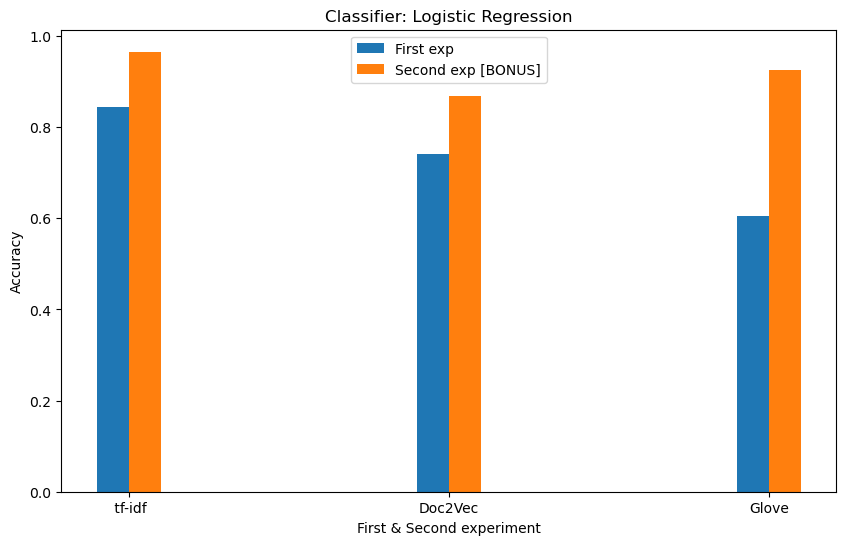

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
words = [" tf-idf", "Doc2Vec", "Glove"]
accuracy_1 = [np.mean(accuracy_scores_lr_td_idf), np.mean(accuracy_scores_lr_doc2vec), np.mean(accuracy_scores_lr_glove)]
accuracy_2 = [np.mean(accuracy_scores_lr_td_idf_bonus), np.mean(accuracy_scores_lr_doc2vec_bonus), np.mean(accuracy_scores_lr_glove_bonus)]

# Plotting
bar_width = 0.1  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(np.arange(len(words)), accuracy_1, bar_width, label='First exp')
bar2 = ax.bar(np.arange(len(words)) + bar_width, accuracy_2, bar_width, label='Second exp [BONUS]')

ax.set_xlabel('First & Second experiment')
ax.set_ylabel('Accuracy')
ax.set_title('Classifier: Logistic Regression')
ax.set_xticks(np.arange(len(words)) + bar_width*0.5)
ax.set_xticklabels(words)
ax.legend()

plt.show()

<span style="font-size: 18px;">**Παρατηρήσεις**</span></br>
Βλέπουμε ότι πραγματικά έχουμε **επιτύχει βελτίωση**, αφού οι <span style="color:blue">**μπλε** στήλες που αναφέρονται στις τιμές από το πρώτο πείραμα</span>, είναι εμφανώς πιο **χαμηλές** από τις <span style="color:orange">**ποροκαλί** στήλες που αναφέρονται στις τιμές του δεύτερου πειράματος</span>.</br>

*Θα μπορούσαμε να εργαστούμε με τον ίδιο τρόπο και για τους άλλους 2 classifiers, αλλά θα δούμε παρόμοια αποτελέσματα και θα έπαιρνε αρκετό χρόνο και χώρο, χωρίς να έχει πολύ ενδιαφέρον. Μπορούμε με μία απλή παρατήρησει στα αποτελέσματα που εκτυπώθηκαν από τα παρπάνω κομμάτια κώδικα, μπορούμε να διακρίνουμε την αισθητή αύξηση των τιμών του πειράτος στο πλαίσιο του bonus σε κάθε μετρική αντίστοιχα σε σχέση με τις αντίστοιχες τιμές της αρχικής άσκησης*